In [99]:
from datetime import date
import datetime
from datetime import datetime  
from datetime import timedelta  
import dateutil.parser
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv(r'C:\Users\JMSch\Desktop\COVID19\full_data_2.csv', sep = ',')
data

,Time,Date,Deaths
0,1,2020-01-22,17
1,2,2020-01-23,18
2,3,2020-01-24,26
3,4,2020-01-25,42
4,5,2020-01-26,56
...,...,...,...
61,62,2020-03-23,16505
62,63,2020-03-24,18625
63,64,2020-03-25,21181
64,65,2020-03-26,23970


In [54]:
data['logDeaths'] = np.log(data.Deaths)
data.head(10)

,Time,Date,Deaths,logDeaths
0,1,2020-01-22,17,2.833213
1,2,2020-01-23,18,2.890372
2,3,2020-01-24,26,3.258097
3,4,2020-01-25,42,3.737670
4,5,2020-01-26,56,4.025352
5,6,2020-01-27,82,4.406719
6,7,2020-01-28,131,4.875197
7,8,2020-01-29,133,4.890349
8,9,2020-01-30,171,5.141664
9,10,2020-01-31,213,5.361292


In [6]:
X = data.Time
X = sm.add_constant(X)

In [8]:
y = data.logDeaths

In [9]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:              logDeaths   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     507.6
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.92e-32
Time:                        12:21:43   Log-Likelihood:                -57.780
No. Observations:                  66   AIC:                             119.6
Df Residuals:                      64   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5272      0.147     30.830      0.000       4.234       4.821
T

In [123]:
def linear_predictions(t):
    return np.exp(4.5272) * np.exp(0.0858) ** t

In [106]:
MaxDate = dateutil.parser.parse(max(data['Date'])).date()

NewDate = MaxDate + timedelta(days=1)  

print(NewDate)

2020-03-28


In [120]:
Current_Horizon = int(max(data['Time']))
Prediction_Horizon = 14 ##Change "14" to adjust the forecasting horizon
MaxDate = dateutil.parser.parse(max(data['Date'])).date()


columns = ['Time', 'Date']
for i in range(Prediction_Horizon):
    New_Time = max(data['Time']) + 1
    Days_Delay = (New_Time - Current_Horizon)
    New_Date = MaxDate + timedelta(days=Days_Delay)  
    data = data.append({'Time': New_Time, 'Date': New_Date},ignore_index=True)


TypeError: '>' not supported between instances of 'datetime.date' and 'str'

In [121]:
data

,Time,Date,Deaths
0,1,2020-01-22,17.0
1,2,2020-01-23,18.0
2,3,2020-01-24,26.0
3,4,2020-01-25,42.0
4,5,2020-01-26,56.0
...,...,...,...
75,76,2020-04-06,NaN
76,77,2020-04-07,NaN
77,78,2020-04-08,NaN
78,79,2020-04-09,NaN


In [124]:
data['Predictions'] = data.Time.apply(linear_predictions)

data.head(10)

,Time,Date,Deaths,Predictions
0,1,2020-01-22,17.0,100.786055
1,2,2020-01-23,18.0,109.815315
2,3,2020-01-24,26.0,119.653492
3,4,2020-01-25,42.0,130.373056
4,5,2020-01-26,56.0,142.052968
5,6,2020-01-27,82.0,154.779264
6,7,2020-01-28,131.0,168.645689
7,8,2020-01-29,133.0,183.754385
8,9,2020-01-30,171.0,200.216644
9,10,2020-01-31,213.0,218.153730


In [127]:
data.to_csv(r'C:\Users\JMSch\Desktop\COVID19\COVID19_Pred.csv', index = False)

No handles with labels found to put in legend.


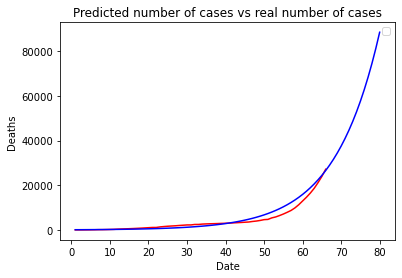

In [126]:
plt.plot(data.Time, data.Deaths, 'red')
plt.plot(data.Time, data.Predictions, 'blue')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()